In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [50]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [51]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5529,ham,What about this one then.,NaN,NaN,NaN
1801,ham,I wanna watch that movie,NaN,NaN,NaN
4910,ham,Love that holiday Monday feeling even if I hav...,NaN,NaN,NaN
1015,ham,"Dear,regret i cudnt pick call.drove down frm c...",NaN,NaN,NaN
3045,ham,So how's the weather over there?,NaN,NaN,NaN


In [52]:
# Data Cleaning


In [53]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [54]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [55]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(403)

In [57]:
df=df.drop_duplicates(keep='first')
print(df.shape)
df.head()

(5169, 2)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


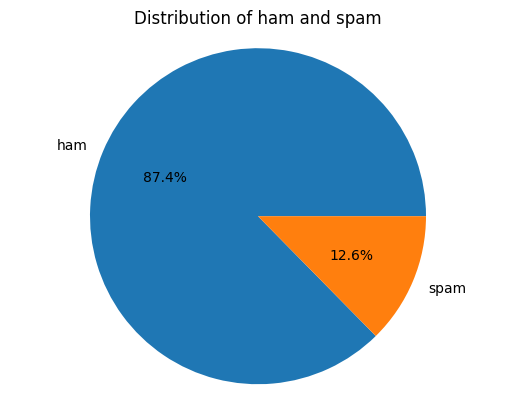

In [58]:
df['target'].value_counts()
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%1.1f%%")
plt.title("Distribution of ham and spam")
plt.axis('equal')
plt.show()


In [59]:
#Average length of spam and ham messages
df['length']=df['text'].apply(len)
df['word_count']=df['text'].apply(lambda x:len(x.split()))
df['number_of_sentences']=df['text'].apply(lambda x:len(x.split('.')))
df.head()

/tmp/ipykernel_8506/2490109957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['text'].apply(len)
/tmp/ipykernel_8506/2490109957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count']=df['text'].apply(lambda x:len(x.split()))
/tmp/ipykernel_8506/2490109957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,target,text,length,word_count,number_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,9
1,ham,Ok lar... Joking wif u oni...,29,6,7
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,7
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [60]:
#avg length of ham messages
avg_length_ham=df[df['target']=='ham']['length'].mean()

#avg length of spam messages
avg_length_spam=df[df['target']=='spam']['length'].mean()   
print(avg_length_ham)
print (avg_length_spam)

70.45925597874225
137.89127105666157


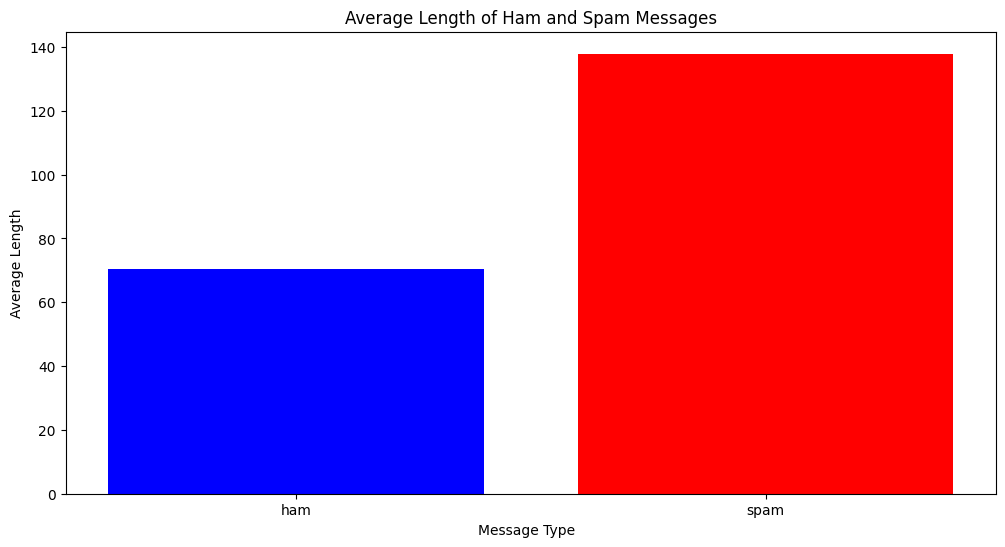

In [61]:
plt.figure(figsize=(12,6))
plt.bar(['ham','spam'],[avg_length_ham,avg_length_spam],color=['blue','red' ])
plt.xlabel('Message Type  ')
plt.ylabel('Average Length')
plt.title('Average Length of Ham and Spam Messages')
plt.show()

In [62]:
#avg word count of ham and spam messages
avg_word_count=df[df['target']=='ham']['word_count'].mean()
avg_word_count_spam=df[df['target']=='spam']['word_count'].mean()
print(avg_word_count)
print(avg_word_count_spam)

14.134632418069089
23.68147013782542


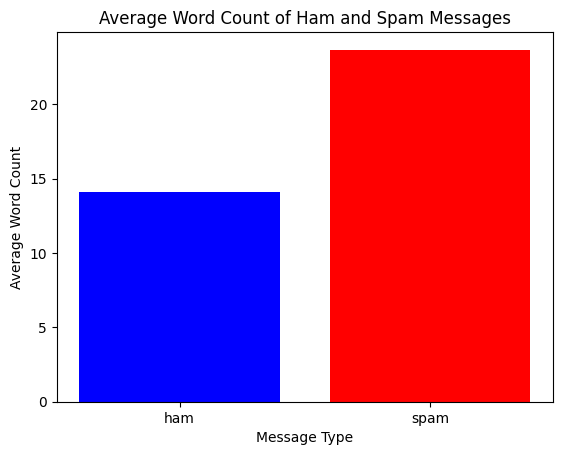

In [63]:
plt.bar(['ham','spam'],[avg_word_count,avg_word_count_spam],color=['blue','red' ])
plt.xlabel('Message Type')
plt.ylabel('Average Word Count')
plt.title('Average Word Count of Ham and Spam Messages')
plt.show()


In [64]:
#avg sentences in ham and spam messages
avg_sentences_ham=df[df['target']=='ham']['number_of_sentences'].mean()
avg_sentences_spam=df[df['target']=='spam']['number_of_sentences'].mean()
print(avg_sentences_ham)
print(avg_sentences_spam)


2.91651904340124
3.0551301684532923


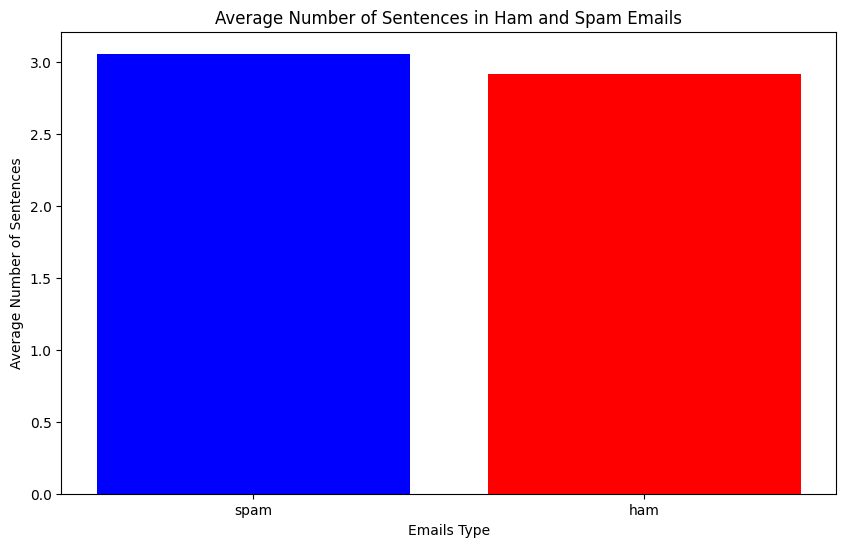

In [65]:
plt.figure(figsize=(10,6))
plt.bar(['spam','ham'],[avg_sentences_spam,avg_sentences_ham],color=['blue','red' ])
plt.xlabel('Emails Type')
plt.ylabel('Average Number of Sentences')
plt.title('Average Number of Sentences in Ham and Spam Emails')
plt.show()

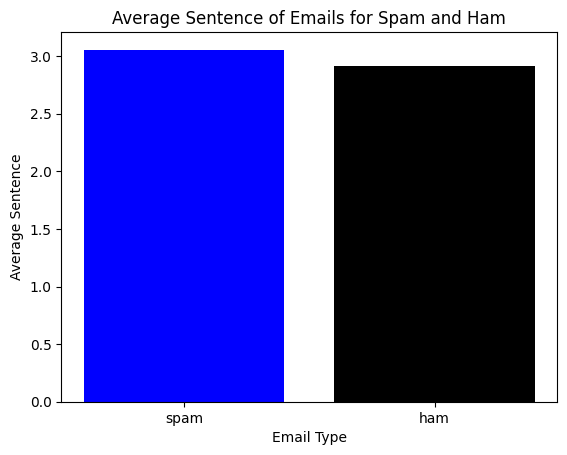

In [66]:
# Plotting the graph
plt.bar(['spam', 'ham'], [avg_sentences_spam, avg_sentences_ham], color=['Blue', 'black'])
plt.title('Average Sentence of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence')
plt.show()

Correlation cofefficient between email length and spam classification: 0.38471706671430717


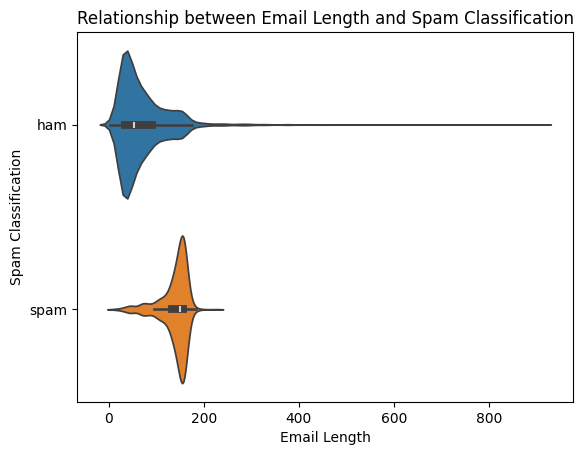

In [67]:
correlation = df['length'].corr((df['target'] == 'spam').astype(int))
print("Correlation cofefficient between email length and spam classification:", correlation)


sns.violinplot(data=df, x='length', y='target', hue='target')
plt.xlabel('Email Length')

plt.ylabel('Spam Classification')
plt.title('Relationship between Email Length and Spam Classification')
plt.show()

In [68]:
df.columns


Index(['target', 'text', 'length', 'word_count', 'number_of_sentences'], dtype='object')

The Relationship between Features are                         length  word_count  number_of_sentences
length               1.000000    0.973667             0.428390
word_count           0.973667    1.000000             0.406421
number_of_sentences  0.428390    0.406421             1.000000


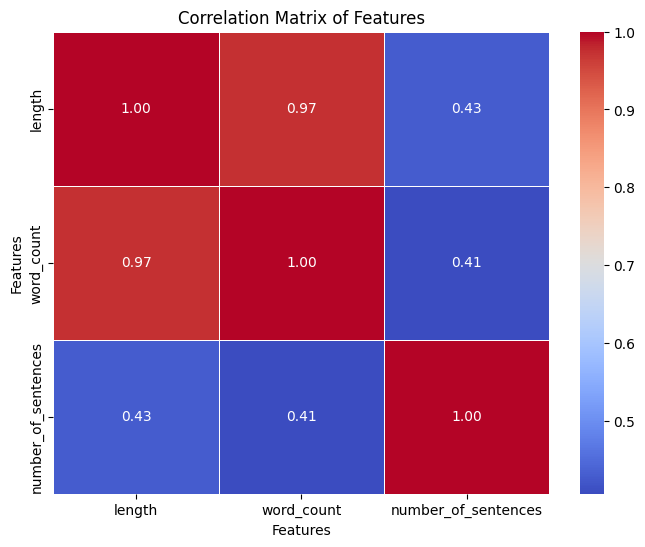

In [70]:

correlation_matrix = df[['length', 'word_count', 'number_of_sentences']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [81]:
#data preprocessing
df['transformed_text']=df.iloc[:,1].str.lower()

df


/tmp/ipykernel_8506/746739815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df.iloc[:,1].str.lower()


,target,text,length,word_count,number_of_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,9,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,6,7,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,11,7,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,5,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1,will ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,5,"pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1,the guy did some bitching but i acted like i'd...


In [86]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /home/sangam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sangam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import RegexpTokenizer

# Tokenize using a regex tokenizer (avoids requiring the 'punkt' resource)
tokenizer = RegexpTokenizer(r'\w+')
df['transformed_text'] = df['transformed_text'].apply(lambda text: tokenizer.tokenize(text))

# Ensure tokens are lowercase and keep only alphanumeric tokens
df['transformed_text'] = df['transformed_text'].apply(lambda tokens: [token.lower() for token in tokens if token.isalnum()])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/sangam/nltk_data'
    - '/home/sangam/Documents/spam/myenv/nltk_data'
    - '/home/sangam/Documents/spam/myenv/share/nltk_data'
    - '/home/sangam/Documents/spam/myenv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [90]:
import nltk

# --- Add these two lines ---
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt', quiet=True)
# ---------------------------.